In [1]:
import h5py 
import mat73
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

In [13]:
subs = ['06','07','10','12','13','15','16','17','18','21']
time_btwn_show_card_and_movement = {}

for sub in subs:
    ncsl_share = '/mnt/ncsl_share'
    setup_path = ncsl_share + f'/Public/EFRI/1_formatted/SUBJECT{sub}/EFRI{sub}_WAR_SES1_Setup.mat'
    setup_data = mat73.loadmat(setup_path)

    elec_areas = np.array(setup_data['elec_area'])

    time_btwn_show_card_and_movement_for_subject = []

    for i in range(len(setup_data['trial_times'])):
        trial_words = setup_data['trial_words'][i][0]
        trial_times = setup_data['trial_times'][i][0]
        if 31 in trial_words and 35 in trial_words: 
            show_card_time = np.where(trial_words == 31)[0][0]
            start_move_time = np.where(trial_words == 35)[0][0]
            time_btwn_show_card_and_movement_for_subject.append(trial_times[start_move_time] - trial_times[show_card_time])

    time_btwn_show_card_and_movement[sub] = time_btwn_show_card_and_movement_for_subject

In [14]:
time_btwn_show_card_and_movement

{'06': [3.119499999999988,
  3.079499999999996,
  2.788499999999999,
  3.1580000000000155,
  2.8135000000000048,
  3.335499999999996,
  2.815999999999974,
  3.1799999999999784,
  2.9385000000000048,
  2.994999999999976,
  2.8185000000000002,
  3.0185000000000173,
  2.7719999999999914,
  3.010499999999979,
  2.908999999999992,
  2.8625000000000114,
  2.920500000000004,
  2.812000000000012,
  2.792500000000018,
  2.9344999999999573,
  2.9320000000000164,
  2.702500000000043,
  2.9659999999999513,
  2.8100000000000023,
  3.2524999999999977,
  2.9594999999999914,
  3.1160000000000423,
  2.968500000000006,
  3.3185000000000286,
  3.1534999999999513,
  2.774000000000001,
  2.8729999999999905,
  2.7104999999999677,
  3.4639999999999986,
  2.898999999999944,
  2.834000000000003,
  2.9389999999999645,
  2.9850000000000136,
  3.0914999999999964,
  3.2789999999999964,
  2.8045000000000755,
  3.0810000000000173,
  3.426499999999919,
  3.142500000000041,
  3.0670000000000073,
  3.0670000000000073,


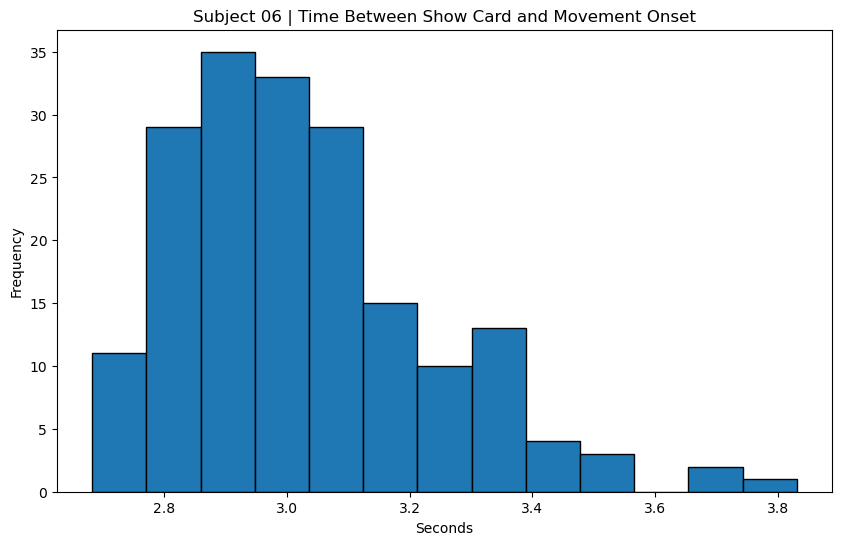

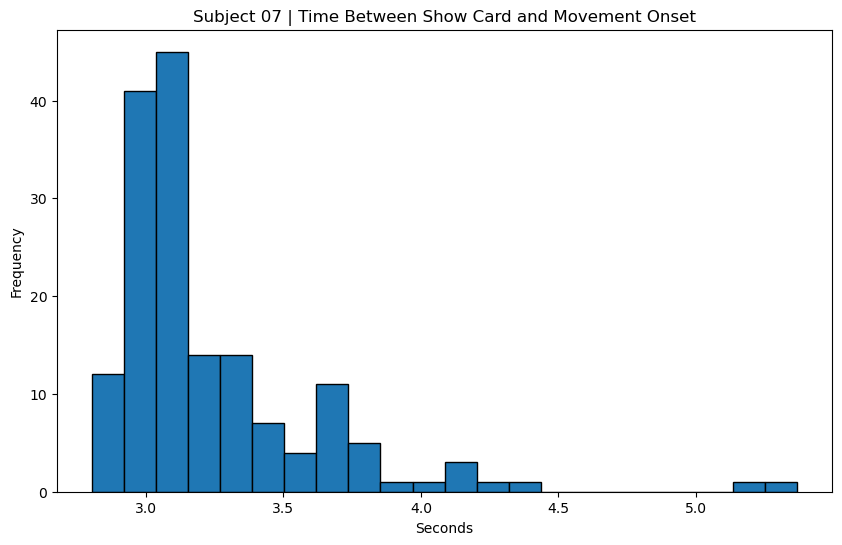

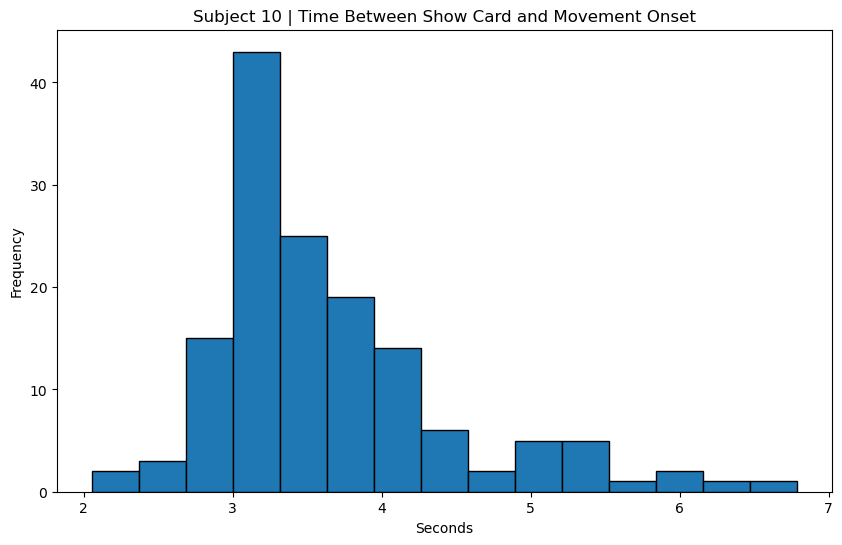

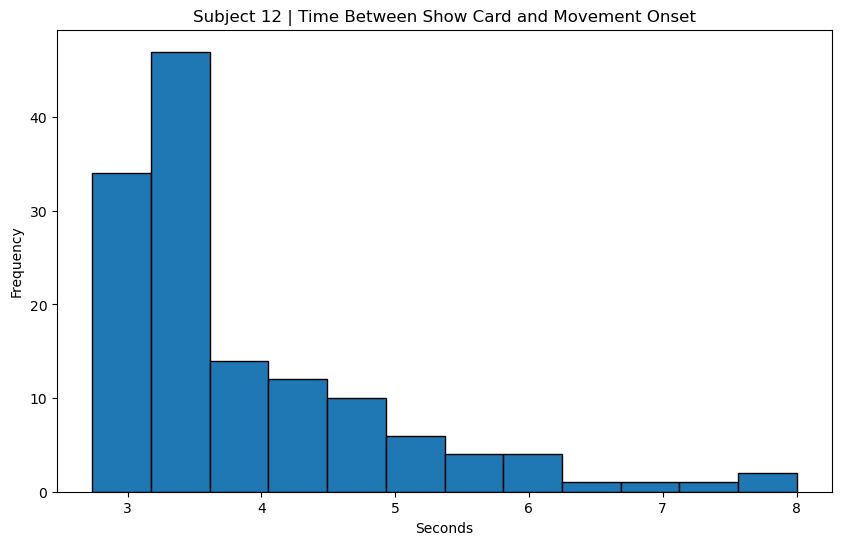

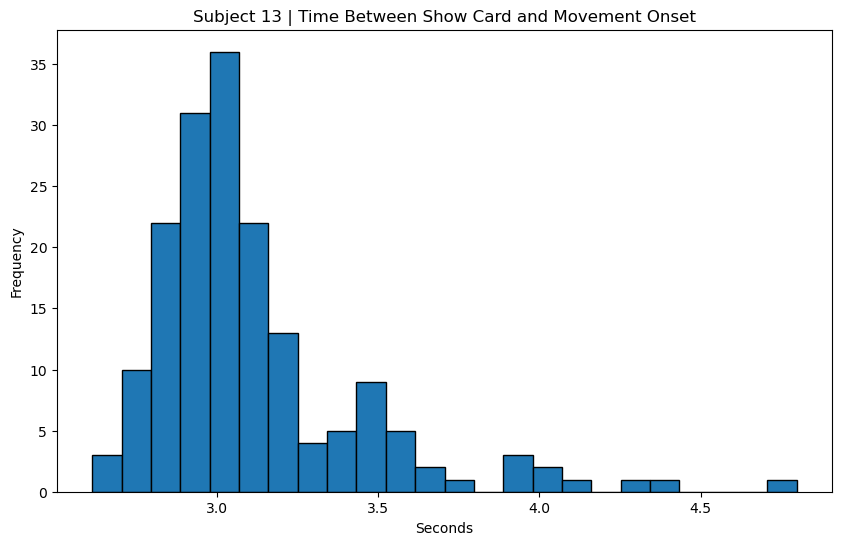

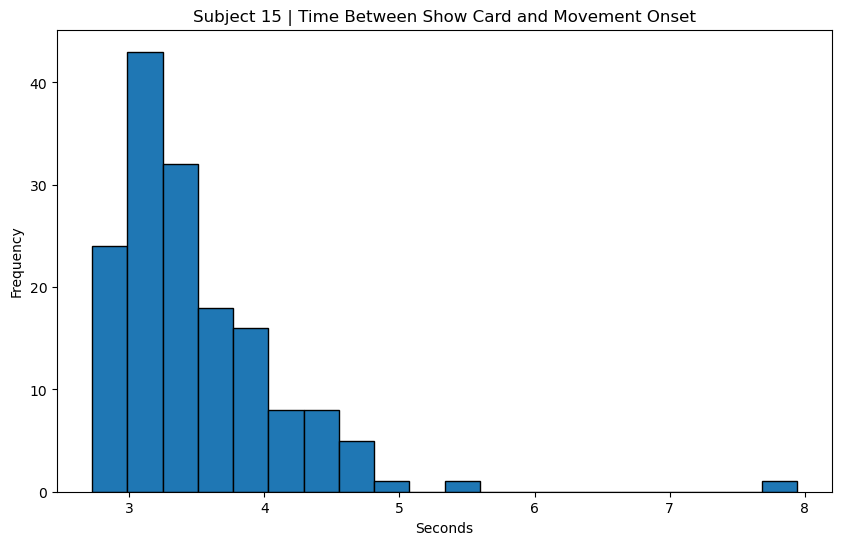

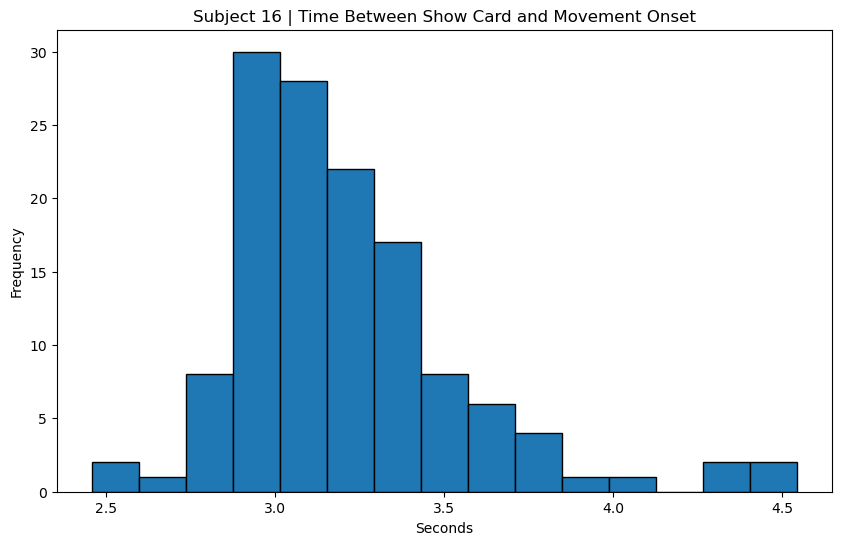

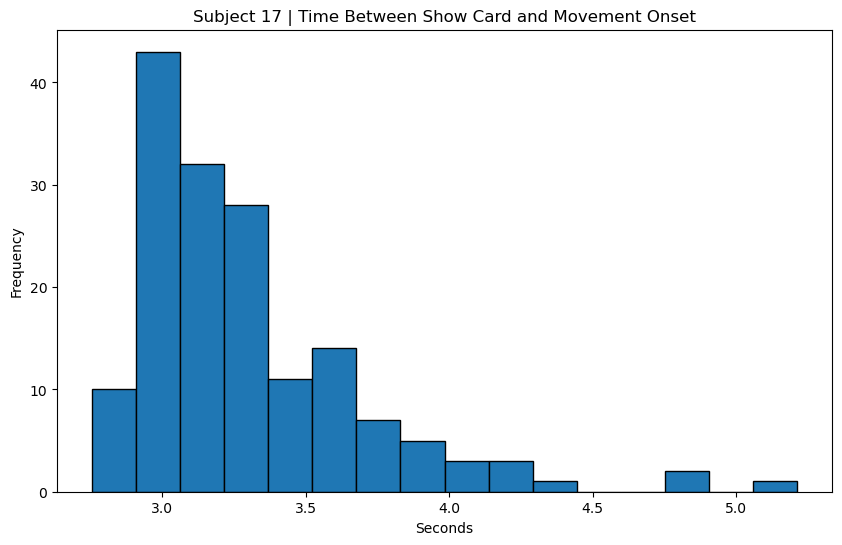

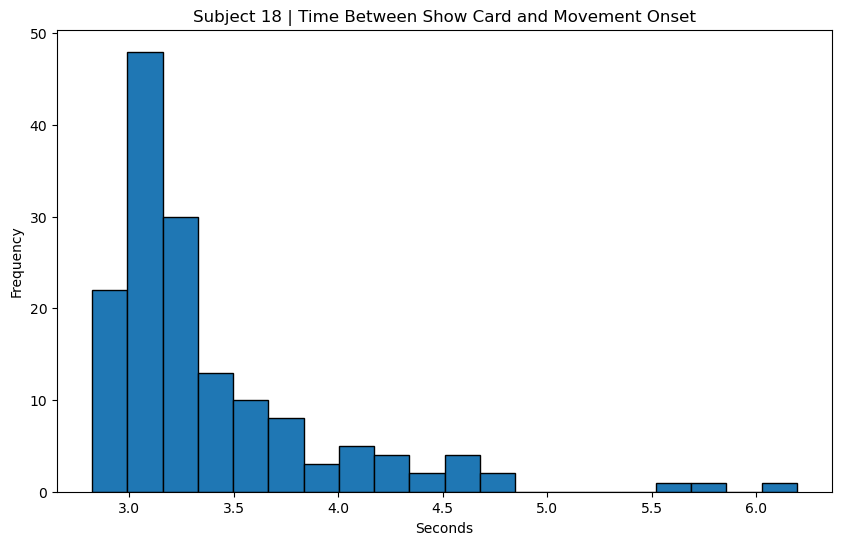

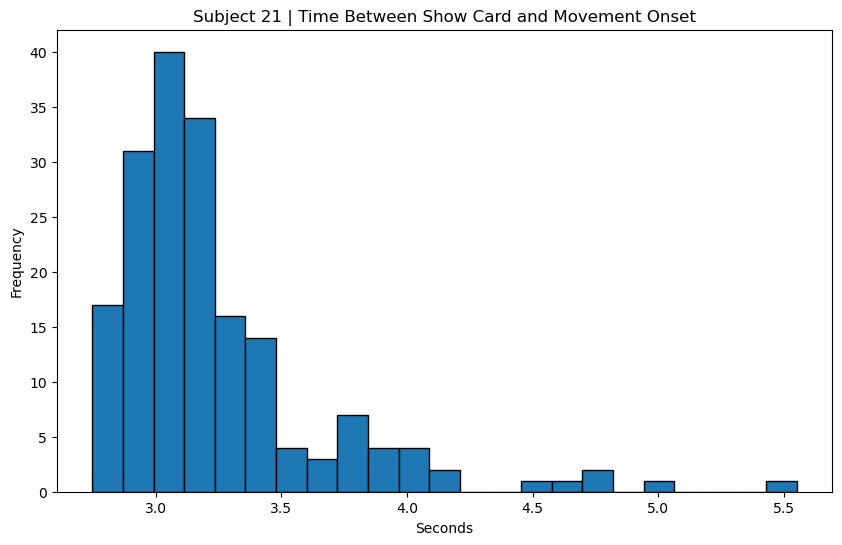

In [30]:
for sub in subs:
    plt.figure(figsize=(10, 6))
    plt.hist(time_btwn_show_card_and_movement[sub], bins='auto', edgecolor='black')
    plt.title('Subject ' + sub + ' | Time Between Show Card and Movement Onset')
    plt.xlabel('Seconds')
    plt.ylabel('Frequency')
    plt.savefig('Plots/TimeBtwnShowCardAndMovementOnset/Time_Histogram_Subject_'+sub+'.png')
    plt.show()

In [4]:
time_btwn_show_card_and_movement

[3.028191891891895,
 3.233858024691354,
 3.648013888888874,
 3.869632352941167,
 3.1138110465116315,
 3.5006337579617828,
 3.206803030303032,
 3.295793749999993,
 3.3865844155844154,
 3.240692307692313]

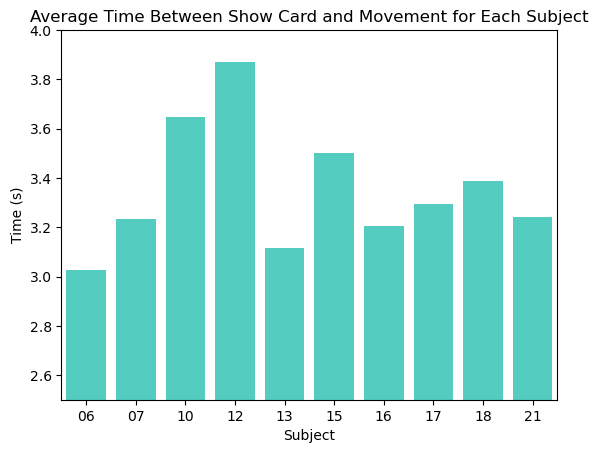

In [27]:
avg_time = []

for sub in time_btwn_show_card_and_movement:
    avg_time.append(np.mean(time_btwn_show_card_and_movement[sub]))

fig, axs = plt.subplots()
sns.barplot(x=np.arange(len(avg_time)), y=avg_time, ax=axs, color='turquoise')
axs.set_title('Average Time Between Show Card and \n Movement Onset for Each Subject')
axs.set_xlabel('Subject')
axs.set_ylabel('Time (s)')
axs.set_xticklabels(subs)
axs.set_ylim(2.5, 4)

plt.savefig('Plots/TimeBtwnShowCardAndMovementOnset/AvgTimeBetweenShowCardAndMovement.png')